In [3]:
!pip install cmake gym[atari] scipy

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for gym: filename=gym-0.24.0-py3-none-any.whl size=790689 sha256=a8e3fc60dd6da66e2482b15100b4e02e678134dbf838215c289b26a87d5653b9
  Stored in directory: c:\users\river\appdata\local\pip\cache\wheels\9b\47\57\bc885affe6e76f253f44982605bc912d681e890e3ceaa74254
Successfully built gym
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [14]:
!pip install cmake gym[toy_text] scipy

In [29]:
import gym

env = gym.make("Taxi-v3").env

env.render()

env.reset() # reset environment to a new, random state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


In [30]:
# Back to our illustration
state = env.encode(3, 1, 3, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

State: 332


In [31]:
# Dictionary structure: {action: [(probability, nextstate, reward, done)]}
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [32]:
action = env.action_space.sample()
print(action)
env.step(action)

0


(106, -1, False, {'prob': 1.0})

In [10]:
# Using p table for default rewards
env.s = 328  # set environment to illustration's state

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
  # automatically selects one random action 
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 10078
Penalties incurred: 3198


In [33]:
from IPython.display import clear_output
from time import sleep
import random
from IPython.display import clear_output
# Implement Q-Learning
import numpy as np

In [ ]:


def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        #print(frame['frame'].getvalue())
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)


# Q RL training function

In [56]:

def Q_RL_trainig(hyperparameters, env, num_episodes = 100000):
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    alpha = hyperparameters[0]
    gamma = hyperparameters[1]
    epsilon = hyperparameters[2]
    total_epochs, total_penalties = 0, 0
    for i in range(num_episodes+1):     
        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            if reward == -10:
                penalties += 1

            state = next_state
            epochs += 1
        total_penalties += penalties
        total_epochs += epochs

        if i % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {i}")
    return q_table, (total_epochs+total_penalties)/100000

In [57]:
alpha = 0.1
gamma = 0.6
epsilon = 0.1
q_table, metrics = Q_RL_trainig((alpha,gamma,epsilon),env)

Episode: 100000


In [59]:
metrics


16.43208

# Q RL Evaluation function

In [43]:

# Evaluation
"""Evaluate agent's performance after Q-learning"""
def Q_RL_evaluation(q_table,env,episodes = 100):
    total_epochs, total_penalties = 0, 0

    for _ in range(episodes+1):
        state = env.reset()
        epochs, penalties, reward = 0, 0, 0

        done = False

        while not done:
            action = np.argmax(q_table[state])
            state, reward, done, info = env.step(action)
            clear_output(wait=True)
            #print(frame['frame'].getvalue())
            print(env.render(mode='ansi'))
            print(f"Timestep: {epochs + 1}")
            print(f"State: {state}")
            print(f"Action: {action}")
            print(f"Reward: {reward}")

            if reward == -10:
                penalties += 1
            epochs += 1
        total_penalties += penalties
        total_epochs += epochs
        sleep(.1)


    print(f"Results after {episodes} episodes:")
    print(f"Average timesteps per episode: {total_epochs / episodes}")
    print(f"Average penalties per episode: {total_penalties / episodes}")


In [44]:
Q_RL_evaluation(q_table,env)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 14
State: 85
Action: 5
Reward: 20
Results after 100 episodes:
Average timesteps per episode: 13.12
Average penalties per episode: 0.0


## **Tune alpha, gamma, and/or epsilon using a decay over episodes**

In [71]:

# importing the required module
import matplotlib.pyplot as plt
  
def tune_alph_gamma_epsilon(alpha_tune, gamma_tune, epsilon_tune ,num_of_iterations = 100000):
    b_alpha = alpha_tune/num_of_iterations
    b_gamma = gamma_tune/num_of_iterations
    b_epsilon = epsilon_tune/num_of_iterations

    alpha_values =[]
    gamma_values =[]
    epsilon_values =[]
    X = []
    for i in range(num_of_iterations+1):
      # set the minimum to 0.001 and the maximum to 0.99
      new_alpha = .999*(1-b_alpha)**i+.001
      X.append(i)
      alpha_values.append(new_alpha)
      gamma_values.append(.999*(1-b_gamma)**i+.001)
      epsilon_values.append(0.999*(1-b_epsilon)**i+.001)
    # x axis values
    x = X
    # corresponding y axis values
    y = alpha_values

    # plotting the points 
    plt.plot(x, alpha_values ,label= "alpha")
    plt.plot(x, gamma_values ,label= "gamma")
    plt.plot(x, epsilon_values ,label= "epsilon")

    # naming the x axis
    plt.xlabel('number of iterations')
    # naming the y axis
    plt.ylabel('y')

    # giving a title to my graph
    plt.title('Exponential Decay')
    plt.legend()
    # function to show the plot
    plt.show()
    return alpha_values,gamma_values,epsilon_values

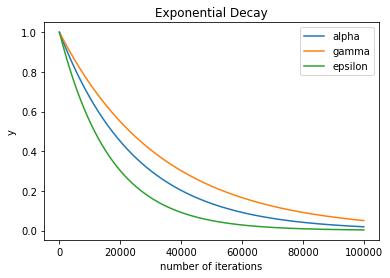

In [73]:

alpha_values,gamma_values,epsilon_values = tune_alph_gamma_epsilon(4,3,6)

# Train with the exponential decay

In [60]:
def Q_RL_train_exponential_decay(hyperparameters, env, num_episodes = 100000):
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    total_epochs, total_penalties = 0, 0
    for i in range(100001):
      # Hyperparameters
        alpha = hyperparameters[i][0]
        gamma = hyperparameters[i][1]
        epsilon = hyperparameters[i][2]
        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            if reward == -10:
                penalties += 1

            state = next_state
            epochs += 1
            total_penalties += penalties
            total_epochs += epochs

            if i % 100 == 0:
                clear_output(wait=True)
                print(f"Episode: {i}")
    print("finished")
    return q_table,(total_epochs+total_penalties)/100000


In [66]:
alist = [alpha_values, gamma_values, epsilon_values]
hyperparemeters = np.column_stack(alist)
print(hyperparemeters)

[[1.         1.         1.        ]
 [0.99996004 0.99997003 0.99994006]
 [0.99992008 0.99994006 0.99988012]
 ...
 [0.01929732 0.05073803 0.00347612]
 [0.01929659 0.05073654 0.00347598]
 [0.01929586 0.05073504 0.00347583]]


In [67]:

q_table2 , metric2 = Q_RL_train_exponential_decay(hyperparemeters, env)
print(metric2)

Episode: 100000
finished
14322.00289


In [68]:
print(metric2)
Q_RL_evaluation(q_table2,env)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 14
State: 85
Action: 5
Reward: 20
Results after 100 episodes:
Average timesteps per episode: 13.24
Average penalties per episode: 0.0


# Find the best hyperparemeter values using the genetic algorithms instead of grid search

In [ ]:
from scipy.optimize import differential_evolution

alpha_lim = (0.1,1)
gamma_lim = (0.1,1)
epsilon_lim = (0.1,1)
boundaries = [alpha_lim] + [gamma_lim]+ [epsilon_lim]

solver = differential_evolution(RL_trainig, boundaries,strategy='best1bin',
                                    popsize=3,mutation=0.5,recombination=0.7,tol=0.01,seed=2020)

In [ ]:
print(solver)
best_hyperparams = solver.x
best_timestamp = solver.fun
# Print final results
print("Converged hyperparameters: alpha= %.6f, gamma= %.6f, epsilon= %.6f" %(best_hyperparams[0],best_hyperparams[1],best_hyperparams[]))    
print("Average timesteps per epochs: %.6f" %(best_timestamp))